In [34]:
import numpy as np
import sklearn as sk
import pandas as pd

In [35]:
df = pd.read_csv('C:/Users/VonGola/Downloads/Compressed/creditcard.csv', low_memory=False)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [36]:
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

Data is extremely unbalanced


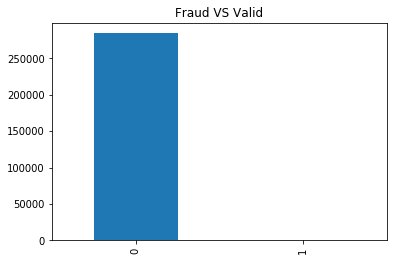

In [37]:
columns=df.columns
features_columns=columns.delete(len(columns)-1)
features=df[features_columns]
labels=df['Class']
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar')
plt.title('Fraud VS Valid')
print("Data is extremely unbalanced")



In [38]:
print(df.groupby('Class').size())

Class
0    284315
1       492
dtype: int64


c:\users\vongola\appdata\local\programs\python\python35\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


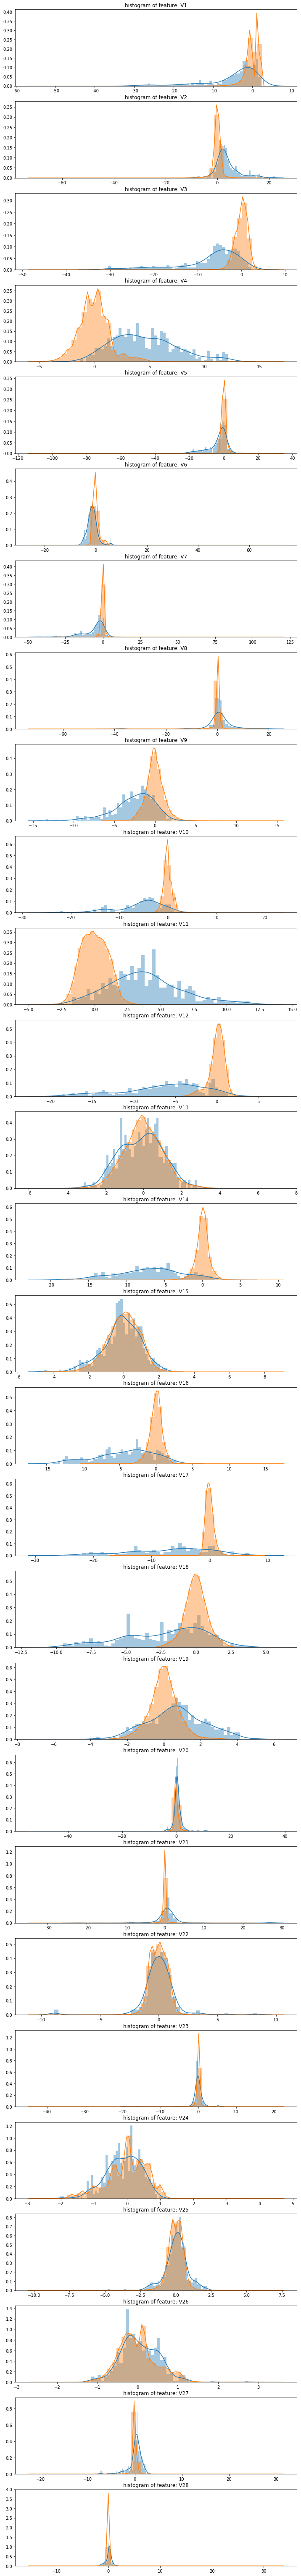

In [13]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
_features = df.ix[:,1:29].columns
plt.figure(figsize=(12,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df[_features]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[cn][df.Class == 1], bins=50)
    sns.distplot(df[cn][df.Class == 0], bins=50)
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [39]:
df = df.drop(['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8'], axis =1)

In [40]:
## Testing dataframe
df_0 = df.sample(frac=0.2)

In [41]:
## dropping fraud cases
df = df.drop(df[df.Class==1].index)

In [42]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,-2.406455e-15,2.239751e-15,1.673327e-15,-1.254995e-15,1.206296e-15,1.437666e-15,-3.800113e-16,9.572133e-16,1.039817e-15,1.656562e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.585956e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.345240e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-1.921433e+01,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-3.483038e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-4.255740e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.283949e-01,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,5.060132e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-2.945017e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,4.931498e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.863772e-01,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,1.052677e+01,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,2.720284e+01,25691.160000,1.000000


In [43]:
X = df.iloc[:,:-1]
y = df['Class']
X2 = df_0.iloc[:,:-1]
y2 = df_0['Class']
X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)


In [47]:
kmeans = KMeans(init='k-means++', n_clusters=16, n_init=14)
kmeans.fit(X_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=14, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

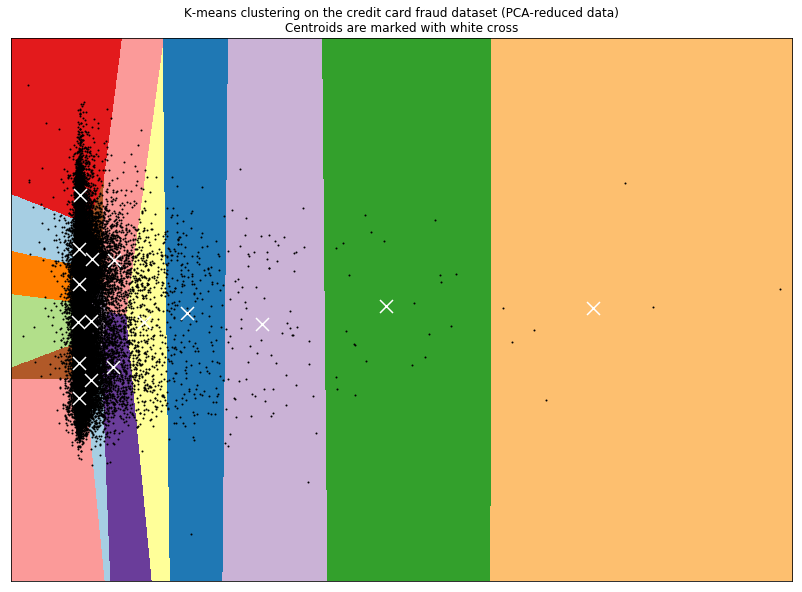

In [48]:
h = .01
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(14, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [49]:
X_scaled = scale(X2)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

predictions = kmeans.predict(X_reduced)
print(predictions)
pred_fraud = np.where(predictions == 1)[0]
real_fraud = np.where(y2 == 1)[0]
false_pos = len(np.setdiff1d(pred_fraud, real_fraud))


pred_good = np.where(predictions == 0)[0]
real_good = np.where(y2 == 0)[0]
false_neg = len(np.setdiff1d(pred_good, real_good))
FP=false_pos
FN=false_neg
TP=len(real_fraud)-FN
TN=len(real_good)-FP
false_neg_rate = false_neg/(false_pos+false_neg)

accuracy = (len(X2) - (false_neg + false_pos)) / len(X2)
print("Accuracy:", accuracy)

print("Total test data points:", len(X2))
import math
MCC=TP*TN-FP*FN
tmp=(TP+FP)*(TP+FN)*(TP + FP)*(TN+FN)
tmp=math.sqrt(tmp)
MCC=MCC/float(tmp)
print("MCC ",MCC)
print("total fraud ",TP+FN)
print("total legit ",TN+FP)
print("TP ",TP)
print("FP ",FP)
print("TN ",TN)
print("FN ",FN)
recall=TP/float(TP+FN)
print("Recall; percentage of detected fraud ",recall)
far=FP/float(TN+FP)
print("false alarm rate ",far)

[ 9  5  0 ... 15  9  6]
Accuracy: 0.9551623040325837
Total test data points: 56961
MCC  0.8043174068217562
total fraud  93
total legit  56868
TP  88
FP  2549
TN  54319
FN  5
Recall; percentage of detected fraud  0.946236559139785
false alarm rate  0.04482309910670324


Conclusion
**Using all available Feature Vectors**

And after Hyper-tuning we had a 79.3% probability of detecting fraud while the probabilty for raising false alarms is less than 5%.

**Dropping Feature Vectors showing extremely similar distributions**

And after Hyper-tuning we have a 94.6% probability of detecting fraud while the probabilty for raising false alarms is stil less than 5%.

A.BELFKIH